In [ ]:
import torch 
import torchvision
from torch.utils.data import Dataset, DataLoader    
import torch.autograd as autograd       
from torch import Tensor                
import torch.nn as nn                   
import torch.nn.functional as F         
import torch.optim as optim             
from torch.jit import script, trace     
from torchvision import datasets, models, transforms    
import torchvision.transforms as transforms             


num_epochs = 5
num_classes = 10
batch_size = 10
learning_rate = 0.001

DATA_PATH = '/Users/avinash1/dataset/'
MODEL_STORE_PATH = '/Users/avinash1/models'

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans,download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /Users/avinash1/dataset/MNIST/raw/train-images-idx3-ubyte.gz to /Users/avinash1/dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /Users/avinash1/dataset/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/avinash1/dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /Users/avinash1/dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/avinash1/dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /Users/avinash1/dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/avinash1/dataset/MNIST/raw



In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/avinash1/dataset/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [ ]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: /Users/avinash1/dataset/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [ ]:
bs = [64,1024]
train_loader1 = DataLoader(train_dataset, batch_size=bs[0], shuffle=True)
test_loader1 = DataLoader(test_dataset, batch_size=bs[0], shuffle=True)

train_loader2 = DataLoader(train_dataset, batch_size=bs[1], shuffle=True)
test_loader2 = DataLoader(test_dataset, batch_size=bs[1], shuffle=True)

In [ ]:
def CalParameters(model):
    val = sum(params.numel() for params in model.parameters() if params.requires_grad)
    return val

In [ ]:
class Model1(nn.Module):
    def __init__(self, in_features=784, h2=20, h3=40, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)    
        self.fc2 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
model1=Model1()
mod1_parameters=CalParameters(model1)
print(mod1_parameters)

16950


In [ ]:
Criterion_loss1 = nn.CrossEntropyLoss()

In [ ]:
optimize1 = torch.optim.Adam(model1.parameters(), lr=0.001)

In [ ]:
epochs = 10
train_corr_model1 = []
test_corr_model1 = []
train_losses_mod1=[]
test_losses_mod1=[]
for i in range(epochs):
    train_corr = 0
    test_corr = 0

   
    for b, (X_train, y_train) in enumerate(train_loader1):
       
        y_pred = model1(X_train.view(-1,784))  
        training_loss = Criterion_loss1(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
      
        optimize1.zero_grad()
        training_loss.backward()
        optimize1.step()
        
    
    train_losses_mod1.append(training_loss)
    train_corr_model1.append(train_corr)
        
    # testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader1):

            y_val = model1(X_test.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    
    test_loss = Criterion_loss1(y_val, y_test)
    test_losses_mod1.append(test_loss)
    test_corr_model1.append(test_corr)

In [ ]:
train_loss_list=[]
for i in range(len(train_losses_mod1)):
     train_loss_list.append(train_losses_mod1[i].detach().numpy())
  
test_loss_list=[]
for i in range(len(test_losses_mod1)):
     test_loss_list.append(test_losses_mod1[i].detach().numpy())
train_accuracy_list=[]
for i in range(len(train_corr_model1)):
     train_accuracy_list.append(train_corr_model1[i].detach().numpy()/600)
test_accuracy_list=[]
for i in range(len(test_corr_model1)):
     test_accuracy_list.append(test_corr_model1[i].detach().numpy()/100)

model 2

In [ ]:
class Model2(nn.Module):
    def __init__(self, in_features=784, h2=20, h3=40, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)    
        self.fc2 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
model2=Model2()
mod2_parameters=CalParameters(model2)
print(mod2_parameters)

16950


In [ ]:
model2

Model2(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=40, bias=True)
  (out): Linear(in_features=40, out_features=10, bias=True)
)

In [ ]:
critical_loss_2 = nn.CrossEntropyLoss()
optim2 = torch.optim.Adam(model2.parameters(), lr=0.001)
epochs = 10
train_losses_mod2=[]
test_losses_mod2=[]
train_correct_mod2 = []
test_correct_mod2 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    
    for b, (X_train, y_train) in enumerate(train_loader2):
       
        y_pred = model2(X_train.view(-1,784))  
        loss = critical_loss_2(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        
        optim2.zero_grad()
        loss.backward()
        optim2.step()
        
    
    train_losses_mod2.append(loss)
    train_correct_mod2.append(train_corr)
        
    
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader2):

           
            y_val = model2(X_test.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    
    loss = critical_loss_2(y_val, y_test)
    test_losses_mod2.append(loss)
    test_correct_mod2.append(test_corr)

In [ ]:
for i in range(len(train_losses_mod2)):
     train_loss_list.append(train_losses_mod2[i].detach().numpy())
  
for i in range(len(test_losses_mod2)):
     test_loss_list.append(test_losses_mod2[i].detach().numpy())
for i in range(len(train_correct_mod2)):
     train_accuracy_list.append(train_correct_mod2[i].detach().numpy()/600)
for i in range(len(test_correct_mod2)):
     test_accuracy_list.append(test_correct_mod2[i].detach().numpy()/100)

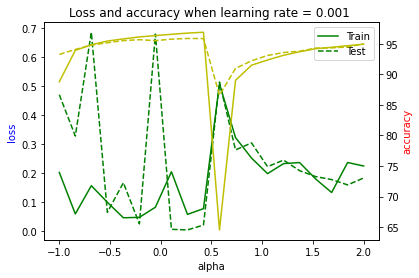

In [ ]:
alpa=np.linspace(-1.0, 2.0, num=20)
thetaArr=[]
for i in range(len(alpa)):
    theta=(1-alpa[i])*mod1_parameters+alpa[i]*mod2_parameters
    thetaArr.append(theta)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alpa, train_loss_list, 'g', label='Train')
ax1.plot(alpa, test_loss_list, 'g--', label='Test')
ax2.plot(alpa, train_accuracy_list, 'y', label='accuracy')
ax2.plot(alpa, test_accuracy_list, 'y--', label='accuracy')
ax1.set_title('Loss and accuracy when learning rate = 0.001 ')
ax1.set_xlabel('alpha')
ax1.set_ylabel('loss', color='b')
ax2.set_ylabel('accuracy', color='r')
ax1.legend(loc='upper right')

When learning rate = 0.01

In [ ]:
class ModelOne(nn.Module):
    def __init__(self, in_features=784, h2=20, h3=40, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)    
        self.fc2 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
model_one=ModelOne()
crit_loss_one = nn.CrossEntropyLoss()
optim_one = torch.optim.Adam(model_one.parameters(), lr=0.01)

In [ ]:
epochs = 10
train_corr_model1 = []
test_corr_model1 = []
train_losses_mod1=[]
test_losses_mod1=[]

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader1):
       
        y_pred = model_one(X_train.view(-1,784))  
        training_loss = crit_loss_one(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
       
        optim_one.zero_grad()
        training_loss.backward()
        optim_one.step()
        
    
    train_losses_mod1.append(training_loss)
    train_corr_model1.append(train_corr)
        
   
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader1):

            y_val = model_one(X_test.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
   
    test_loss = crit_loss_one(y_val, y_test)
    test_losses_mod1.append(test_loss)
    test_corr_model1.append(test_corr)

In [ ]:
train_loss_list=[]
for i in range(len(train_losses_mod1)):
     train_loss_list.append(train_losses_mod1[i].detach().numpy())
test_loss_list=[]
for i in range(len(test_losses_mod1)):
     test_loss_list.append(test_losses_mod1[i].detach().numpy())
train_accuracy_list=[]
for i in range(len(train_corr_model1)):
     train_accuracy_list.append(train_corr_model1[i].detach().numpy()/600)
test_accuracy_list=[]
for i in range(len(test_corr_model1)):
     test_accuracy_list.append(test_corr_model1[i].detach().numpy()/100)

Model 2 for 0.01

In [ ]:
class ModelTwo(nn.Module):
    def __init__(self, in_features=784, h2=20, h3=40, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)    
        self.fc2 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
model_two=ModelTwo()
crit_loss_two = nn.CrossEntropyLoss()
optim_two = torch.optim.Adam(model_two.parameters(), lr=0.01)

In [ ]:
epochs = 10
train_correct_mod2 = []
test_correct_mod2 = []
train_losses_mod2=[]
test_losses_mod2=[]

for i in range(epochs):
    train_corr = 0
    test_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader2):
       
        y_pred = model_two(X_train.view(-1,784))  
        training_loss = crit_loss_two(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
       
        optim_two .zero_grad()
        training_loss.backward()
        optim_two .step()
        
   
    train_losses_mod2.append(training_loss)
    train_correct_mod2.append(train_corr)
        
    
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader2):

            y_val = model_two(X_test.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    
    test_loss = crit_loss_two(y_val, y_test)
    test_losses_mod2.append(test_loss)
    test_correct_mod2.append(test_corr)

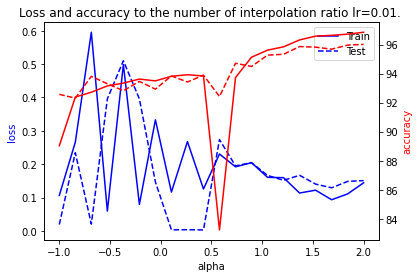

In [ ]:
for i in range(len(train_losses_mod2)):
     train_loss_list.append(train_losses_mod2[i].detach().numpy())
for i in range(len(test_losses_mod2)):
     test_loss_list.append(test_losses_mod2[i].detach().numpy())
for i in range(len(train_correct_mod2)):
     train_accuracy_list.append(train_correct_mod2[i].detach().numpy()/600)
for i in range(len(test_correct_mod2)):
     test_accuracy_list.append(test_correct_mod2[i].detach().numpy()/100)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alpa, train_loss_list, 'b', label='Train')
ax1.plot(alpa, test_loss_list, 'b--', label='Test')
ax2.plot(alpa, train_accuracy_list, 'r', label='accuracy')
ax2.plot(alpa, test_accuracy_list, 'r--', label='accuracy')
ax1.set_title('Loss and accuracy to the number of interpolation ratio lr=0.01. ')
ax1.set_xlabel('alpha')
ax1.set_ylabel('loss', color='b')
ax2.set_ylabel('accuracy', color='r')
ax1.legend(loc='upper right')